<a href="https://colab.research.google.com/github/blessjal/practicums/blob/master/eras_trimmed_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_excel('/content/sample_data/eras_trimmed.xlsx')

df.head()

,masked_patient_id,Age,sex,race,admission_date,date,discharge_date,date_of_surgery,proc_codes,proc_code_desc,length_of_stay,benign_disease,malignant_disease,diabetes_mellitus,COPD_or_asthma_or_emphysema,Congestive_heart_failure,Obesity_comorb,Tobacco_abuse,chronic_kidney_disease,chronic_steroid_use,chronic_constipation,hemoglobin_yn,hemoglobin_result_value,hemoglobin_result_unit,hematocrit_yn,hematocrit_result_value,hematocrit_result_unit,albumin_yn,albumin_result_value,albumin_result_unit,prealbumin_yn,prealbumin_result_value,prealbumin_result_unit,mu_opioid_antagonist_yn,epidurals_yn,BMI,ostomy_teaching,Tot_bloodloss,urinary_retention,tapblock_yn,...,anastomoticleak_yn,Fentanyl_Transdermal_mcg,Fentanyl_Transdermal_mcg_mme,Fentanyl_Epidural_mcg,Fentanyl_Epidural_mcg_mme,Fentanyl_IV_mcg,Fentanyl_IV_mcg_mme,Hydrocodone_po_mg,Hydrocodone_po_mg_mme,hydromorphone_po_mg,hydromorphone_po_mg_mme,hydromorphone_Epidural_mg,hydromorphone_Epidural_mg_mme,hydromorphone_IV_mg,hydromorphone_IV_mg_mme,meperidine_po_mg,meperidine_po_mg_mme,meperidine_IV_mg,meperidine_IV_mg_mme,methadone_po_mg,methadone_po_mg_mme,methadone_IV_mg,methadone_IV_mg_mme,morphine_ER_po_mg,morphine_IV_mg,morphine_IV_mg_mme,morphine_po_mg,nalbuphine_iv_mg,nalbuphine_iv_mg_mme,oxycodone_ER_mg,oxycodone_ER_mg_mme,oxycodone_po_mg,oxycodone_po_mg_mme,oxymorphone_ER_po_mg,oxymorphone_ER_po_mg_mme,tramadol_po_mg,tramadol_po_mg_mme,redmission_30day_yn,Unnamed: 80,Total MME
0,32838,54,Male,White,42810.636111,03/16/2017,42811.979167,42810.636111,44140,PR PART REMOVAL COLON W ANASTOMOSIS,1,N,N,N,Y,Y,N,Y,N,N,N,Y,5.2,g/dL,Y,16.4,%,N,NaN,NaN,N,NaN,NaN,N,N,25.90,N,NaN,N,N,...,N,0,0.0,0,0.0,200.0,20.0,0.0,0.0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,10.0,30.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,0.0,N,NaN,260.0
1,80520,51,Male,White,41911.000000,09/29/2014,41911.000000,41911.000000,"44208, 44213","PR LAP,SURG,COLECTOMY,W/ANAST,W/COLOSTOMY, PR...",1,Y,N,N,N,N,N,N,N,N,Y,Y,11.5,g/dL,Y,34.5,%,Y,3.8,g/dL,N,NaN,NaN,N,N,30.36,N,NaN,N,N,...,N,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,0.0,N,NaN,0.0
2,123734,80,Female,White,43250.975000,05/30/2018,43251.777083,43250.975000,44141,PR PART REMOVAL COLON W COLOSTOMY,1,Y,N,N,Y,N,N,N,N,N,Y,Y,9.2,g/dL,Y,29.3,%,Y,2.1,g/dL,Y,5.3,mg/dL,N,N,18.24,Y,NaN,N,N,...,N,0,0.0,0,0.0,50.0,5.0,0.0,0.0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,2.0,6.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,0.0,N,NaN,63.0
3,266252,59,Male,White,43360.237500,09/17/2018,43361.427083,43360.237500,44204,"PR LAP,SURG,COLECTOMY, PARTIAL, W/ANAST",1,N,Y,Y,N,N,N,N,N,N,N,Y,12.8,g/dL,Y,38.3,%,Y,4.3,g/dL,Y,30.9,mg/dL,N,N,26.66,N,NaN,N,N,...,N,0,0.0,0,0.0,200.0,20.0,0.0,0.0,0,0,0,0,1.3,26,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,35.0,52.5,0,0,0,0.0,N,NaN,334.8
4,293250,33,Male,Black or African American,42574.747917,07/23/2016,42574.000000,42574.747917,44160,PR REMVL COLON & TERM ILEUM W/ILEOCOLOSTOMY,1,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,N,N,NaN,N,NaN,N,N,...,N,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,0.0,N,NaN,0.0


In [3]:
df.shape

(1307, 82)

In [4]:
df.dtypes

masked_patient_id        int64
Age                     object
sex                     object
race                    object
admission_date         float64
                        ...   
tramadol_po_mg           int64
tramadol_po_mg_mme     float64
redmission_30day_yn     object
Unnamed: 80            float64
Total MME              float64
Length: 82, dtype: object

In [5]:
import datetime
df['date'] = pd.to_datetime(df['date'])

In [6]:
df['date'] = df['date'].dt.to_period("Y")


In [7]:
df.head()

,masked_patient_id,Age,sex,race,admission_date,date,discharge_date,date_of_surgery,proc_codes,proc_code_desc,length_of_stay,benign_disease,malignant_disease,diabetes_mellitus,COPD_or_asthma_or_emphysema,Congestive_heart_failure,Obesity_comorb,Tobacco_abuse,chronic_kidney_disease,chronic_steroid_use,chronic_constipation,hemoglobin_yn,hemoglobin_result_value,hemoglobin_result_unit,hematocrit_yn,hematocrit_result_value,hematocrit_result_unit,albumin_yn,albumin_result_value,albumin_result_unit,prealbumin_yn,prealbumin_result_value,prealbumin_result_unit,mu_opioid_antagonist_yn,epidurals_yn,BMI,ostomy_teaching,Tot_bloodloss,urinary_retention,tapblock_yn,...,anastomoticleak_yn,Fentanyl_Transdermal_mcg,Fentanyl_Transdermal_mcg_mme,Fentanyl_Epidural_mcg,Fentanyl_Epidural_mcg_mme,Fentanyl_IV_mcg,Fentanyl_IV_mcg_mme,Hydrocodone_po_mg,Hydrocodone_po_mg_mme,hydromorphone_po_mg,hydromorphone_po_mg_mme,hydromorphone_Epidural_mg,hydromorphone_Epidural_mg_mme,hydromorphone_IV_mg,hydromorphone_IV_mg_mme,meperidine_po_mg,meperidine_po_mg_mme,meperidine_IV_mg,meperidine_IV_mg_mme,methadone_po_mg,methadone_po_mg_mme,methadone_IV_mg,methadone_IV_mg_mme,morphine_ER_po_mg,morphine_IV_mg,morphine_IV_mg_mme,morphine_po_mg,nalbuphine_iv_mg,nalbuphine_iv_mg_mme,oxycodone_ER_mg,oxycodone_ER_mg_mme,oxycodone_po_mg,oxycodone_po_mg_mme,oxymorphone_ER_po_mg,oxymorphone_ER_po_mg_mme,tramadol_po_mg,tramadol_po_mg_mme,redmission_30day_yn,Unnamed: 80,Total MME
0,32838,54,Male,White,42810.636111,2017,42811.979167,42810.636111,44140,PR PART REMOVAL COLON W ANASTOMOSIS,1,N,N,N,Y,Y,N,Y,N,N,N,Y,5.2,g/dL,Y,16.4,%,N,NaN,NaN,N,NaN,NaN,N,N,25.90,N,NaN,N,N,...,N,0,0.0,0,0.0,200.0,20.0,0.0,0.0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,10.0,30.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,0.0,N,NaN,260.0
1,80520,51,Male,White,41911.000000,2014,41911.000000,41911.000000,"44208, 44213","PR LAP,SURG,COLECTOMY,W/ANAST,W/COLOSTOMY, PR...",1,Y,N,N,N,N,N,N,N,N,Y,Y,11.5,g/dL,Y,34.5,%,Y,3.8,g/dL,N,NaN,NaN,N,N,30.36,N,NaN,N,N,...,N,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,0.0,N,NaN,0.0
2,123734,80,Female,White,43250.975000,2018,43251.777083,43250.975000,44141,PR PART REMOVAL COLON W COLOSTOMY,1,Y,N,N,Y,N,N,N,N,N,Y,Y,9.2,g/dL,Y,29.3,%,Y,2.1,g/dL,Y,5.3,mg/dL,N,N,18.24,Y,NaN,N,N,...,N,0,0.0,0,0.0,50.0,5.0,0.0,0.0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,2.0,6.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,0.0,N,NaN,63.0
3,266252,59,Male,White,43360.237500,2018,43361.427083,43360.237500,44204,"PR LAP,SURG,COLECTOMY, PARTIAL, W/ANAST",1,N,Y,Y,N,N,N,N,N,N,N,Y,12.8,g/dL,Y,38.3,%,Y,4.3,g/dL,Y,30.9,mg/dL,N,N,26.66,N,NaN,N,N,...,N,0,0.0,0,0.0,200.0,20.0,0.0,0.0,0,0,0,0,1.3,26,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,35.0,52.5,0,0,0,0.0,N,NaN,334.8
4,293250,33,Male,Black or African American,42574.747917,2016,42574.000000,42574.747917,44160,PR REMVL COLON & TERM ILEUM W/ILEOCOLOSTOMY,1,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,N,N,NaN,N,NaN,N,N,...,N,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,0.0,N,NaN,0.0


In [8]:
df_yearly = df[['date', 'tapblock_yn', 'Total MME', 'length_of_stay', 'redmission_30day_yn', 'anastomoticleak_yn']]



columns = ['Date', 'Tapblock', 'MME', 'LOS', 'Readmit', 'Leak']
df_yearly.columns = columns
df_yearly.head()

,Date,Tapblock,MME,LOS,Readmit,Leak
0,2017,N,260.0,1,N,N
1,2014,N,0.0,1,N,N
2,2018,N,63.0,1,N,N
3,2018,N,334.8,1,N,N
4,2016,N,0.0,1,N,N


In [9]:
df_yearly.columns

Index(['Date', 'Tapblock', 'MME', 'LOS', 'Readmit', 'Leak'], dtype='object')

In [10]:
grouped = df_yearly.groupby('Date')['MME', 'LOS'].mean()
grouped


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,MME,LOS
Date,,
2014,1229.534122,10.682432
2015,1033.003037,9.649533
2016,921.935321,9.188073
2017,1004.925738,9.362869
2018,811.397650,8.457265
2019,698.583730,7.428571
2020,367.062500,8.750000


In [11]:
grouped['MPD'] = grouped.MME/grouped.LOS #MPD = MME per Day

grouped

,MME,LOS,MPD
Date,,,
2014,1229.534122,10.682432,115.098703
2015,1033.003037,9.649533,107.052131
2016,921.935321,9.188073,100.340439
2017,1004.925738,9.362869,107.330960
2018,811.397650,8.457265,95.940904
2019,698.583730,7.428571,94.040118
2020,367.062500,8.750000,41.950000


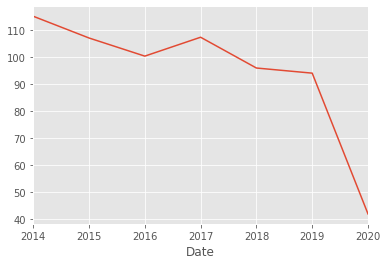

In [12]:
grouped['MPD'].plot()

In [13]:
df_yearly.groupby('Date')['LOS'].mean()

Date
2014    10.682432
2015     9.649533
2016     9.188073
2017     9.362869
2018     8.457265
2019     7.428571
2020     8.750000
Freq: A-DEC, Name: LOS, dtype: float64

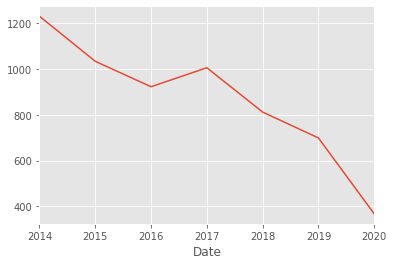

In [14]:
grouped['MME'].plot()

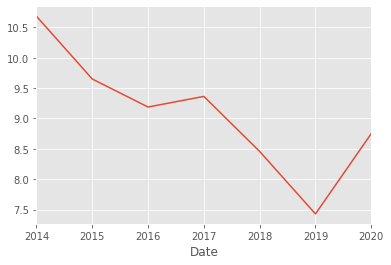

In [15]:
grouped.LOS.plot()

In [16]:
df_yearly.groupby('Date')['Tapblock'].value_counts()

Date  Tapblock
2014  N           148
2015  N           123
      Y            91
2016  N           113
      Y           105
2017  N           119
      Y           118
2018  N           120
      Y           114
2019  Y           153
      N            99
2020  N             4
Name: Tapblock, dtype: int64

In [17]:
tap_mme = df_yearly.groupby('Date').mean()
tap_mme

,MME,LOS
Date,,
2014,1229.534122,10.682432
2015,1033.003037,9.649533
2016,921.935321,9.188073
2017,1004.925738,9.362869
2018,811.397650,8.457265
2019,698.583730,7.428571
2020,367.062500,8.750000


In [18]:
tap_mme.reset_index()
n = tap_mme.iloc[0, 0]
y = tap_mme.iloc[1, 0]


In [19]:
pct_reduc = (n-y)/(n)

In [ ]:
pct_reduc
print('The percent reduction in MME for Tapblock: {:.4f}'.format(pct_reduc*100) + '%')

The percent reduction in MME for Tapblock: 15.9842%


In [20]:
tap1 = tap_mme['MME']


tap1 = pd.DataFrame(tap1)

In [21]:
tap1['Diff1'] = tap1.pct_change()
tap1.dropna(axis=0, inplace=True)
tap1

,MME,Diff1
Date,,
2015,1033.003037,-0.159842
2016,921.935321,-0.107519
2017,1004.925738,0.090018
2018,811.397650,-0.192579
2019,698.583730,-0.139037
2020,367.062500,-0.474562


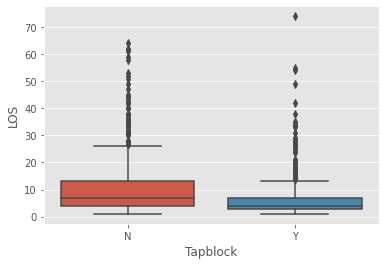

In [ ]:
sns.boxplot(data=df_yearly, x='Tapblock', y='LOS')

In [22]:
df_yearly['log_MME'] = np.log(df_yearly.MME)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


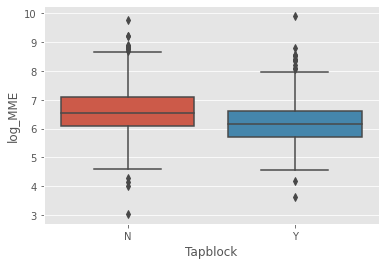

In [24]:
sns.boxplot(data=df_yearly, x='Tapblock', y='log_MME')

In [ ]:
df_yearly.groupby('Readmit').agg(['mean', 'count'])

MME              LOS      
                mean count       mean count
Readmit                                    
N         872.286415  1071   8.671335  1071
Y        1166.706144   236  10.453390   236

In [ ]:
df_yearly.groupby('Leak').median()

,MME,LOS
Leak,,
N,578.0,5
Y,1102.0,13


In [ ]:
pd.pivot_table(df_yearly, index = ['Readmit', 'Tapblock'], values=['MME', 'LOS'],
                     aggfunc={'MME' : 'mean', 'LOS' : 'median'})

LOS          MME
Readmit Tapblock                  
N       N           7  1067.583568
        Y           4   650.923705
Y       N           7  1254.397134
        Y           6   992.434177

In [ ]:
pd.pivot_table(df_yearly, index = ['Leak', 'Tapblock'], values=['MME', 'LOS'],
                     aggfunc={'MME' : 'mean', 'LOS' : 'median'})

LOS          MME
Leak Tapblock                  
N    N           7  1081.500579
     Y           4   670.433912
Y    N          14  1630.814286
     Y          12  1130.548529

In [ ]:
mme_per_day = df_yearly.MME.mean()/df_yearly.LOS.mean()

print('The overall MME per day: {:.2f}'.format(mme_per_day))

The overall MME per day: 102.91


In [ ]:
grouped1 = df_yearly.groupby(['Date', 'Readmit']).mean()

In [ ]:
df_yearly.groupby('Date')['Readmit'].value_counts()

Date  Readmit
2014  N          117
      Y           31
2015  N          180
      Y           34
2016  N          178
      Y           40
2017  N          200
      Y           37
2018  N          183
      Y           51
2019  N          210
      Y           42
2020  N            3
      Y            1
Name: Readmit, dtype: int64

In [ ]:
df_yearly['Leak'].value_counts()

N    1238
Y      69
Name: Leak, dtype: int64